# **Modelos Clássicos de Classificação Supervisionada**

In [ ]:
# Importação e vizualização dos dados
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [ ]:
# Criação de uma nova coluna que contêm os dados de milhas_por_ano em Km
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [ ]:
# Criação de um modelo que cria uma coluna para dizer a idade de um carro
from datetime import datetime

dados['idade'] = datetime.today().year - dados['ano_do_modelo']
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,25
1,7843,1998,40557.96,1,12622.05362,27
2,7109,2006,89627.50,0,11440.79806,19
3,26823,2015,95276.14,0,43167.32682,10
4,7935,2014,117384.68,1,12770.11290,11


In [ ]:
# Removendo colunas desnecessárias
dados.drop(columns=['milhas_por_ano', 'ano_do_modelo'], axis = 1, inplace=True)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,25
1,40557.96,1,12622.05362,27
2,89627.50,0,11440.79806,19
3,95276.14,0,43167.32682,10
4,117384.68,1,12770.11290,11


In [ ]:
# Separação das váriaveis, independente e dependente
x = dados[['preco', 'idade', 'km_por_ano']]
y = dados['vendido']

# **SVC:**
Classificador que encontra um hiperplano para separar as classes, usando núcleos para lidar com dados não lineares.

# **LinearSVC:**
Versão mais rápida do SVC, otimizada para problemas lineares.

# **DummyClassifier:**
Modelo simples que faz previsões básicas, como a classe mais frequente, usado como baseline.

# **DecisionTreeClassifier:**
Modelo baseado em uma árvore de decisão, dividindo os dados de forma recursiva para classificar com base em características.

**Reprodutibilidade:** Permite que você e outras pessoas possam reproduzir exatamente os mesmos resultados ao rodar o código, o que é essencial para testes e comparações.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Semente para garantir reprodutibilidade
SEED = 20

# Dividindo os dados em treino e teste
# x = dados de entrada (features), y = rótulos (labels)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, # Garante que a divisão seja reprodutível
                                                         stratify = y) # Garante que a proporção de classes seja preservada
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


# Normalizando os dados (transformando as características para a mesma escala)
scaler = StandardScaler()
scaler.fit(raw_treino_x) # Calcula a média e o desvio padrão nos dados de treino

# Aplicando a transformação nos dados de treino e teste
treino_x = scaler.transform(raw_treino_x) # Normaliza os dados de treino
teste_x = scaler.transform(raw_teste_x)  # Normaliza os dados de teste com os mesmos parâmetros


# Criando o modelo SVC (Máquinas de Vetores de Suporte)
modelo = SVC()
# Treinando o modelo com os dados de treino normalizados
modelo.fit(treino_x, treino_y)
# Fazendo previsões nos dados de teste
previsoes = modelo.predict(teste_x)

# Calculando a acurácia do modelo comparando as previsões com os rótulos reais
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 75.92%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Semente para garantir reprodutibilidade
SEED = 20

# Dividindo os dados em treino e teste
# x = dados de entrada (features), y = rótulos (labels)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

# Normalizando os dados (transformando as características para a mesma escala)
scaler = StandardScaler()
scaler.fit(raw_treino_x)

# Aplicando a transformação nos dados de treino e teste
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# Criando o modelo LinearSVC
modelo = LinearSVC()
# Treinando o modelo com os dados de treino normalizados
modelo.fit(treino_x, treino_y)
# Fazendo previsões nos dados de teste
previsoes = modelo.predict(teste_x)

# Calculando a acurácia do modelo comparando as previsões com os rótulos reais
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 69.92%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

# Criando o modelo DummyClassifier
classificador = DummyClassifier()
# Treinando o modelo com os dados de treino (não requer normalização, pois o DummyClassifier não depende das características)
classificador.fit(raw_treino_x, treino_y)
# Fazendo previsões nos dados de teste
previsoes = classificador.predict(raw_teste_x)


# Calculando a acurácia do modelo comparando as previsões com os rótulos reais
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

A acurácia do dummy foi de 58.00%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

# Criando o modelo DummyClassifier. (strategy='stratified') Isso significa que o classificador vai fazer previsões com base na distribuição proporcional
classificador = DummyClassifier(strategy='stratified')
# Treinando o modelo com os dados de treino (não requer normalização, pois o DummyClassifier não depende das características)
classificador.fit(raw_treino_x, treino_y)
# Fazendo previsões nos dados de teste
previsoes = classificador.predict(raw_teste_x)

# Calculando a acurácia do modelo comparando as previsões com os rótulos reais
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

A acurácia do dummy foi de 51.80%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Semente para garantir reprodutibilidade
SEED = 20

# Dividindo os dados em treino e teste
# x = dados de entrada (features), y = rótulos (labels)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

# scaler = StandardScaler()
# scaler.fit(raw_treino_x)

# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

# Criando o modelo DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=3)
# Treinando o modelo com os dados de treinamento
modelo.fit(treino_x, treino_y)
# Fazendos previsões nos dados de teste
previsoes = modelo.predict(teste_x)

# Calculando a acurácia do modelo comparando as previsões com os rótulos reais
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 78.40%


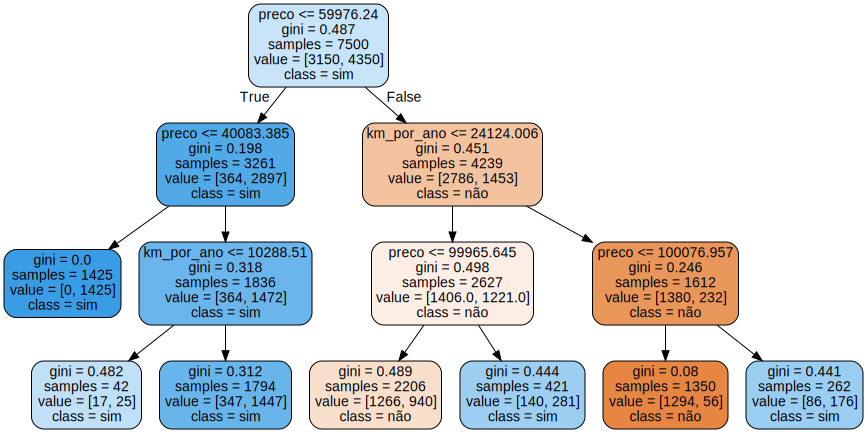

In [ ]:
# Vizualização da representação de um DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, filled=True, rounded=True,
                            feature_names=x.columns,
                            class_names=['não', 'sim'])

grafico = graphviz.Source(estrutura)
grafico